In [1]:
import pandas as pd
data=pd.read_excel("https://data.hossam.kr/G02/customer.xlsx")

# Heigrarchical_Clustering

DBSCAN에서 씌였던 데이터를 그대로 이용하겠다

In [3]:
import sklearn.preprocessing as skpre
import sklearn.model_selection
import scipy as sp

불필요 feature 제거

In [5]:
data.drop("고객ID",axis=1,inplace=True)

성별 encoding           
Male : 1            
Female : 0

In [7]:
data["성별"]=data["성별"].apply(lambda x:1 if x=="Male" else 0)

MinMax_scale

In [14]:
use_data=pd.merge(data["성별"],pd.DataFrame(skpre.minmax_scale(X=data[data.columns.difference(["성별"])]),columns=data.columns.difference(["성별"]))
         ,left_index=True,right_index=True)

## 모델 생성

시각화는 `scipy`가 더 편하다(단 데이터가 너무 많으면 좋은 방법은 아님)

* 방법 과 거리에 대한 설명이 필요하나, 뒤의 `sklearn` 파트에서 하겠음

In [20]:
model=sp.cluster.hierarchy.linkage(use_data,method="ward")

### 결과 시각화

In [25]:
import matplotlib.pyplot as plt

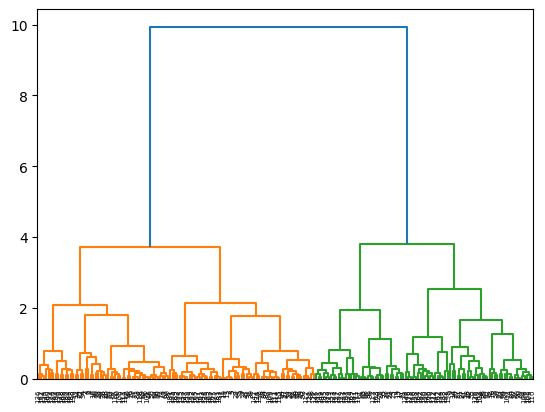

In [26]:
plt.figure()
sp.cluster.hierarchy.dendrogram(model)
plt.show()
plt.close()

위의 과정으로 쉽게 AgglomerativeClusering의 과정을 볼 수 있으나 사용하기에 어려움 -> 결과를 추출하기 어려움

## 모델생성(scikit-learn)

In [27]:
import sklearn.cluster as skclu

* 파라미터

|para|설명|
|--|--|
|n_clusters=2|언제까지 합칠것인가|
|metric="euclidean"|거리측정방법|
|distance_therehold|거리의 제한, 이를 넘어가면 더 이상 merge하지않음|
|compute_full_tree|실제로 n_cluster까지만 계산하게 만듬|
|linkage="ward"|클러스터 간의 거리 측정방법|
|compute_distance|시각화하고싶으면 True|

In [35]:
model2=skclu.AgglomerativeClustering(n_clusters=2,metric="euclidean",linkage="ward",compute_distances=True,distance_threshold=None)

In [38]:
result=model2.fit(X=use_data)

In [44]:
import numpy as np

In [50]:
result.children_

array([[129, 131],
       [ 65,  68],
       [  3,   5],
       [ 60,  70],
       [114, 115],
       [112, 121],
       [117, 119],
       [ 11,  19],
       [ 84,  87],
       [ 48,  49],
       [ 46,  50],
       [100, 105],
       [147, 159],
       [ 96, 101],
       [ 99, 113],
       [109, 110],
       [ 62,  67],
       [176, 178],
       [103, 120],
       [ 13, 202],
       [123, 127],
       [ 71,  83],
       [  1,  15],
       [ 61, 201],
       [141, 149],
       [134, 138],
       [ 54,  56],
       [157, 161],
       [ 89, 213],
       [ 74,  80],
       [173, 179],
       [135, 155],
       [156, 158],
       [ 85,  92],
       [ 78, 208],
       [163, 167],
       [133, 212],
       [ 79, 221],
       [181, 183],
       [111, 204],
       [ 42,  55],
       [ 31,  39],
       [ 47,  58],
       [171, 177],
       [ 75,  95],
       [124, 132],
       [ 93, 205],
       [ 66,  76],
       [153, 165],
       [152, 154],
       [ 72,  73],
       [ 90, 106],
       [150,

In [53]:
len(result.children_)

199

In [52]:
len(result.distances_)

199

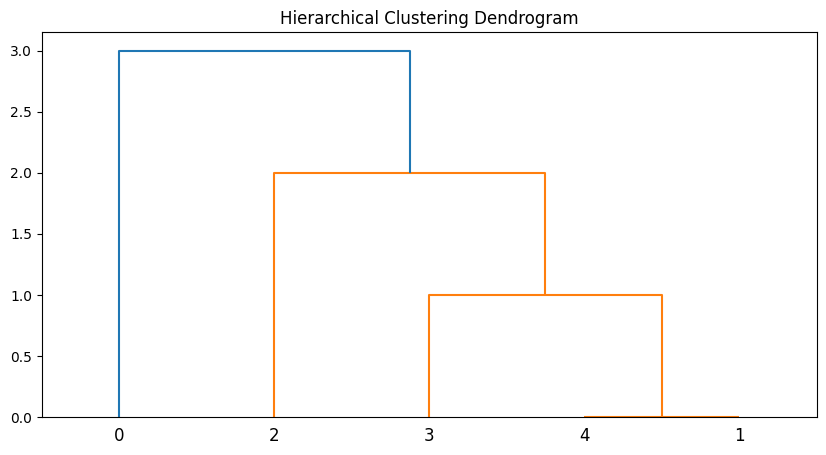

In [57]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# 예제 데이터 생성
data = np.array([[1, 2], [2, 3], [2, 4], [4, 2], [5, 5]])

# Agglomerative Clustering 모델 생성
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0)  # distance_threshold를 사용하여 덴드로그램을 그리기 위해 n_clusters를 None으로 설정

# 군집화 수행
clustering.fit(data)

# 덴드로그램 그리기
def plot_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_

    # 계층적 군집에서 군집 레벨과 거리를 추출
    distance = np.arange(children.shape[0])

    # 각 군집 병합 지점에 대한 덴드로그램 그리기
    no_of_observations = np.arange(2, children.shape[0] + 2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # 덴드로그램 그리기
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, labels=clustering.labels_)
plt.show()

In [58]:
model.children_

AttributeError: 'numpy.ndarray' object has no attribute 'children_'